In [1]:
import numpy as np
import pandas as pd

from pyquaternion import Quaternion

from trackml.dataset import load_event, load_dataset
from trackml.score import score_event

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans, DBSCAN
from scipy.spatial.distance import cdist
from scipy.sparse.csgraph import connected_components
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

%matplotlib inline

In [3]:
def make_counts(labels):
    _,reverse,count = np.unique(labels,return_counts=True,return_inverse=True)
    counts = count[reverse]
    counts[labels==0]=0
    
    return counts

In [2]:
# def run_dbscan():

data_dir = '../data/train'

#     event_ids = [
#             '000001030',##
#             '000001025','000001026','000001027','000001028','000001029',
#     ]

event_ids = [
        '000001030',##

]

sum=0
sum_score=0
for i,event_id in enumerate(event_ids):
    particles = pd.read_csv(data_dir + '/event%s-particles.csv'%event_id)
    hits  = pd.read_csv(data_dir + '/event%s-hits.csv'%event_id)
    cells = pd.read_csv(data_dir + '/event%s-cells.csv'%event_id)
    truth = pd.read_csv(data_dir + '/event%s-truth.csv'%event_id)
    particles = pd.read_csv(data_dir + '/event%s-particles.csv'%event_id)
    
    truth = pd.merge(truth, particles, how='left', on='particle_id')
    hits = pd.merge(hits, truth, how='left', on='hit_id')

In [3]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight,vx,vy,vz,px,py,pz,q,nhits
0,1,-60.8722,-2.90994,-1502.5,7,2,1,427858663433043968,-60.8900,-2.93122,-1502.5,-0.389865,-0.039903,-9.71788,0.000008,0.010578,-0.000096,-2.68331,-0.396593,-0.000155,-9.72165,-1.0,12.0
1,2,-68.6209,-6.93030,-1502.5,7,2,1,923241222145835008,-68.6150,-6.94011,-1502.5,-0.225243,-0.003877,-4.86031,0.000008,0.012087,-0.023069,13.10000,-0.216069,-0.041984,-4.86522,1.0,13.0
2,3,-64.5802,2.66632,-1502.5,7,2,1,4523734434054144,-64.5634,2.67475,-1502.5,-0.284755,-0.008789,-6.74716,0.000006,-0.009604,0.008012,-2.28776,-0.292098,0.031685,-6.75259,-1.0,16.0
3,4,-88.7343,-7.35970,-1502.5,7,2,1,261225408500858880,-88.7490,-7.38212,-1502.5,-0.904795,-0.049219,-15.14960,0.000012,0.001303,0.017286,-8.23350,-0.894095,-0.099110,-15.15630,1.0,14.0
4,5,-88.3262,-13.04520,-1502.5,7,2,1,743099023757410304,-88.3163,-13.05070,-1502.5,-0.295502,-0.016784,-4.90527,0.000006,-0.011713,-0.011290,-5.07843,-0.283424,-0.068196,-4.91150,1.0,16.0


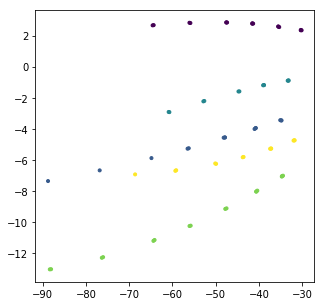

In [10]:
hits1 = hits[(hits.particle_id == 427858663433043968) | (hits.particle_id == 923241222145835008) |
               (hits.particle_id == 4523734434054144) | (hits.particle_id == 261225408500858880) |
            (hits.particle_id == 743099023757410304)]
#     print(hits.head())
figure = plt.figure(figsize=(5,5))
    
plt.scatter(hits1.x, hits1.y, marker='.', c=hits1['particle_id'])
plt.show()

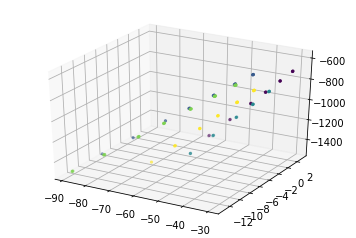

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(hits1.x, hits1.y, hits1.z, marker='.',c=hits1['particle_id'])

In [19]:
df = hits
x  = df.x.values
y  = df.y.values
z  = df.z.values

dz = 0
z = z + dz

rt  = np.sqrt(x**2+y**2)
r  = np.sqrt(x**2+y**2+z**2)
a0  = np.arctan2(y,x)

x2 = x/r
y2 = y/r


phi = np.arctan2(y, x)
phi_deg= np.degrees(np.arctan2(y, x))


z1 = z/rt
z2 = z/r

z3 = np.log1p(abs(z/r))*np.sign(z)

theta = np.arctan2(rt, z)
tt = np.tan(theta)

mm = 1
ls = []


# for ii in range(Niter):
mm = mm * (-1)
ii = 0
a1 = a0+mm*(rt+ 0.0000145*rt**2)/1000*(ii/2)/180*np.pi


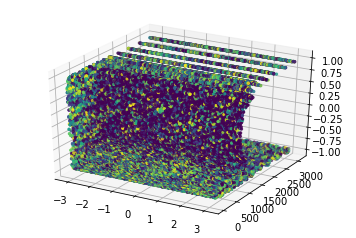

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a1, r, z/r, marker='.',c=hits['particle_id'])

In [21]:
ii = 1
a1 = a0+mm*(rt+ 0.0000145*rt**2)/1000*(ii/2)/180*np.pi

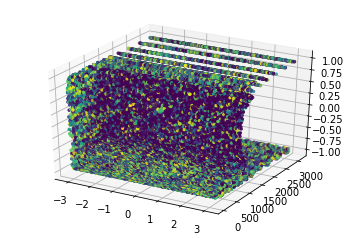

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a1, r, z/r, marker='.',c=hits['particle_id'])

In [43]:
def make_counts(labels):
    _,reverse,count = np.unique(labels,return_counts=True,return_inverse=True)
    counts = count[reverse]
    counts[labels==0]=0
    
    return counts


In [27]:
a = [1,0,2,0,3,1,0,2,2,1,4,5]

In [28]:
a.count(1)

3

In [31]:
x,reverse,count = np.unique(a,return_counts=True,return_inverse=True)

In [32]:
count

array([3, 3, 3, 1, 1, 1])

In [33]:
x

array([0, 1, 2, 3, 4, 5])

In [34]:
x[0]

0

In [35]:
reverse

array([1, 0, 2, 0, 3, 1, 0, 2, 2, 1, 4, 5])

In [36]:
counts = count[reverse]

In [37]:
counts

array([3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1])

In [39]:
counts[a == 0]

array([], shape=(0, 12), dtype=int64)

In [41]:
a

[1, 0, 2, 0, 3, 1, 0, 2, 2, 1, 4, 5]

In [44]:
count = make_counts(a)

In [45]:
count

array([3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1])

In [46]:
df = pd.DataFrame()

In [47]:
df['l'] = a

In [50]:
#  dfh['N2'] = dfh.groupby('s2')['s2'].transform('count')
df.groupby('l')['l'].transform('count')

0     3
1     3
2     3
3     3
4     1
5     3
6     3
7     3
8     3
9     3
10    1
11    1
Name: l, dtype: int64

In [16]:
a = np.array([1,6,2,6,3,1,6,2,2,1,4,5])
b = np.array([1,6,1,6,3,1,5,2,1,2,4,5])
c = np.array([2,6,2,5,3,1,6,2,1,2,4,5])
d = np.array([1,6,2,6,2,1,6,1,1,2,4,5])
e = np.array([1,5,2,6,3,1,6,2,1,2,4,5])
f = np.array([2,6,3,6,1,1,3,2,2,3,4,5])

In [17]:
ls = []
ls.append(a)
ls.append(b)
ls.append(c)
ls.append(d)
ls.append(e)
ls.append(f)

In [18]:
num_hits=len(a)
labels = np.zeros(num_hits,np.int32)
counts = np.zeros(num_hits,np.int32)
for l in ls:
    print(l)
    c = make_counts(l)
    print(c)
    idx = np.where((c-counts>0) & (c<20))[0]
    print(idx)
    labels[idx] = l[idx] + labels.max()
    print(labels)
    counts = make_counts(labels)
    print(counts)
    print('----------------------------------------')

[1 6 2 6 3 1 6 2 2 1 4 5]
[3 3 3 3 1 3 3 3 3 3 1 1]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[1 6 2 6 3 1 6 2 2 1 4 5]
[3 3 3 3 1 3 3 3 3 3 1 1]
----------------------------------------
[1 6 1 6 3 1 5 2 1 2 4 5]
[4 2 4 2 1 4 2 2 4 2 1 2]
[ 0  2  5  8 11]
[ 7  6  7  6  3  7  6  2  7  1  4 11]
[4 3 4 3 1 4 3 1 4 1 1 1]
----------------------------------------
[2 6 2 5 3 1 6 2 1 2 4 5]
[4 2 4 2 1 2 2 4 2 4 1 2]
[ 7  9 11]
[ 7  6  7  6  3  7  6 13  7 13  4 16]
[4 3 4 3 1 4 3 2 4 2 1 1]
----------------------------------------
[1 6 2 6 2 1 6 1 1 2 4 5]
[4 3 3 3 3 4 3 4 4 3 1 1]
[4 7 9]
[ 7  6  7  6 18  7  6 17  7 18  4 16]
[4 3 4 3 2 4 3 1 4 2 1 1]
----------------------------------------
[1 5 2 6 3 1 6 2 1 2 4 5]
[3 2 3 2 1 3 2 3 3 3 1 2]
[ 7  9 11]
[ 7  6  7  6 18  7  6 20  7 20  4 23]
[4 3 4 3 1 4 3 2 4 2 1 1]
----------------------------------------
[2 6 3 6 1 1 3 2 2 3 4 5]
[3 2 3 2 2 2 3 3 3 3 1 1]
[4 7 9]
[ 7  6  7  6 24  7  6 25  7 26  4 23]
[4 3 4 3 1 4 3 1 4 1 1 1]
------------------

In [19]:
labels

array([ 7,  6,  7,  6, 24,  7,  6, 25,  7, 26,  4, 23], dtype=int32)

In [20]:
a1 = a.copy()

In [21]:
a1

array([1, 6, 2, 6, 3, 1, 6, 2, 2, 1, 4, 5])

In [24]:
np.any(a1 > 6)

False

In [25]:
a2 = a1

In [26]:
a1[a1==6] = 0

In [27]:
a1

array([1, 0, 2, 0, 3, 1, 0, 2, 2, 1, 4, 5])

In [35]:
np.where(a1 == 1)[0]

array([0, 5, 9])

In [36]:
for ii in np.where(a1 == 1)[0]:
    print(ii)
    print('test')

0
test
5
test
9
test


In [105]:
df = pd.DataFrame()
df['track_id'] = [2,4,6,8,9]
df['dummy'] = [2,3,6,8,1] 

In [106]:
df_l = df[df.track_id > 4]

In [117]:
list(df_l[df_l.track_id > 4].index)

[2, 3, 4]

In [118]:
list(df_l[df_l.track_id > 4].index)

[2, 3, 4]

In [119]:
a = list(df_l[df_l.track_id > 4].index)

In [120]:
a

[2, 3, 4]

In [121]:
a.pop(0)

2

In [122]:
a

[3, 4]

In [123]:
df_l

,track_id,dummy
2,6,6
3,8,8
4,9,1


In [125]:
df.loc[a, 'track_id'] = 99999

In [126]:
df

,track_id,dummy
0,2,2
1,4,3
2,6,6
3,99999,8
4,99999,1


In [3]:
sub = pd.read_csv('../submissions/submission-0025.csv')

In [4]:
sub.head()

,event_id,hit_id,track_id
0,0,1,0
1,0,2,1
2,0,3,2
3,0,4,3
4,0,5,4157387


In [5]:
sub['track_count'] = sub.groupby('track_id')['track_id'].transform('count')

In [6]:
s1 = set(sub.track_id.values)

In [7]:
len(s1)

3640388

In [8]:
len(sub)

13741466

In [9]:
l = sub.track_id.values

In [10]:
idx = np.where(l < 0)

In [11]:
idx


(array([      79,      103,      122, ..., 13741454, 13741455, 13741457]),)

In [12]:
len(list(idx[0]))

1568245

In [13]:
L1 = list(idx[0])

In [14]:
sub1 = sub.loc[sub.track_id < 0]

In [15]:
s2 = set(sub1.track_id.values) # negaive track_ids

In [16]:
print(len(s1), len(s2), len(sub), len(sub1))

3640388 989354 13741466 1568245


In [17]:
s3 = s1 -s2 # all postive track_ids

In [18]:
len(s3)

2651034

In [19]:
# s4 = set(range(1, np.iinfo(np.int32).max)) - s3

In [20]:
L1 = list(s1) # all track_ids
L2 = list(s2) # negative track_id

In [21]:
import pickle
with open ('../cache/L5_rem_track_ids_2', 'rb') as fp:
    L5 = pickle.load(fp)

In [22]:
np.iinfo(np.int32).max

2147483647

In [23]:
#  _,reverse,count = np.unique(l,return_counts=True,return_inverse=True)


In [24]:
# len(list(count))

In [25]:
# plt.hist(sub.track_id.values, bins=[0,1000000, 10000000, 100000000])
# plt.show()

In [26]:
# ls = []

In [27]:
# for l1 in tqdm(range(1, 2000000)):
#     if l1 in L1:
#         continue
#     ls.append(l1)

In [28]:
sub1.head()

,event_id,hit_id,track_id,track_count
79,0,80,-2125881299,1
103,0,104,-2125325214,1
122,0,123,-2126455021,5
272,0,273,-2124834128,11
304,0,305,-2125351041,11


In [29]:
# sub2 = sub1[sub1.track_count <= 5]

In [30]:
# len(set(sub2.track_id.values))

In [31]:
len(L2)

989354

In [32]:
len(L5)

989354

In [33]:
# L5.pop(0)

In [34]:
# sub.loc[(sub.track_count < 7) & (sub.track_id < 0), 'track_id'] = 4649

In [35]:
sub.shape

(13741466, 4)

In [36]:
sub1 = sub[(sub.track_id < 0)]

In [37]:
sub1.shape

(1568245, 4)

In [38]:
# L2 = sub1.track_id.values

In [39]:
# L6 = L5[:len(L2)]

In [ ]:
import numpy as np
condition = [sub['track_id'] == l for l in L2]
sub['track_id'] = np.select(condition, L5, sub['track_id'])

In [7]:
f = np.array([1, 2, 4, 7, 11, 16], dtype=np.float)
f_prime = np.gradient(f)

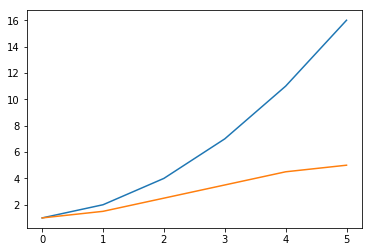

In [8]:
plt.plot(f)
plt.plot(f_prime)

In [10]:
np.polyfit(f, f1, 1)

NameError: name 'f1' is not defined

In [3]:
event_ids = [ '%09d'%i for i in range(0,125) ]  #(0,125)
submissions = []
for i,event_id in enumerate(event_ids):
    submission  = pd.read_csv('../cache/sub3/sub31/%s.csv.gz'%event_id, compression='gzip')
    submissions.append(submission)


# Create submission file
submission = pd.concat(submissions, axis=0)
submission.to_csv('../submissions/sub3/submission-0030-1.csv.gz',
                    index=False, compression='gzip')
print(len(submission))

13741466
